In [1]:
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
crime_df = pd.read_csv("USArrests.csv")
crime_df.head()

State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

Text(0, 0.5, 'Urban Population')

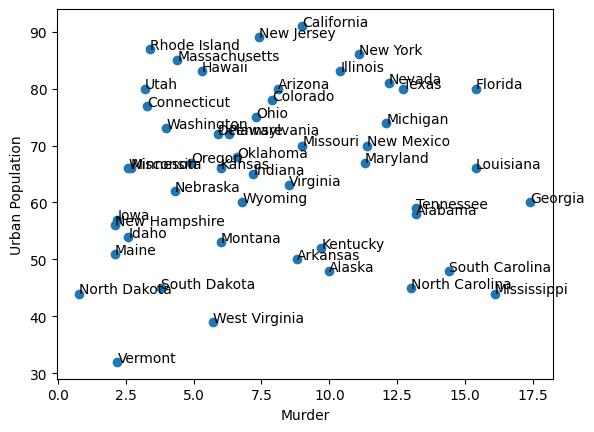

In [4]:
from sklearn.cluster import KMeans
x = crime_df.drop('State', axis=1)
y = crime_df['State']
plt.scatter(x['Murder'],x["UrbanPop"])

#enumerating allows us to keep track of the indexes for each iteration
for i, txt in enumerate(y):
    plt.annotate(txt, (x['Murder'][i], x['UrbanPop'][i]))

plt.xlabel('Murder')
plt.ylabel("Urban Population")

In [6]:
import numpy as np
inertias = []
distortions = []

for k in range(1,10):
    #build and fit
    model = KMeans(n_clusters=k).fit(x)
    #distortion is the avg of the squared euclidean distance from the cluster center to the datapoints
    distance = cdist(x, model.cluster_centers_, 'euclidean')
    distortion = sum(np.min(distance, axis=1))/x.shape[0]
    distortions.append(distortion)
    #inertia is the distance between each datapoint and the centroid and summing the square across the cluster
    #a good model is one with low inertia/distortion and a low number of clusters
    inertia = model.inertia_
    inertias.append(inertia)

Text(0.5, 1.0, 'Elbow method with distortion')

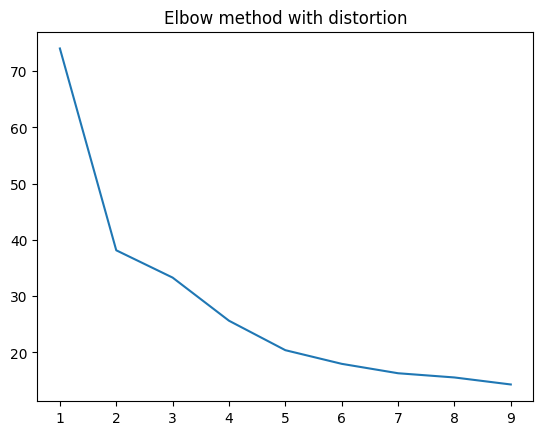

In [7]:
plt.plot(range(1,10), distortions)
plt.title('Elbow method with distortion')

Text(0.5, 1.0, 'Elbow method with inertia')

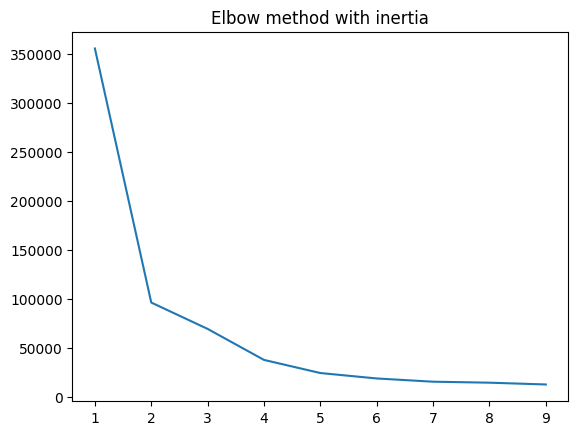

In [8]:
plt.plot(range(1,10), inertias)
plt.title('Elbow method with inertia')

# Hierarchical

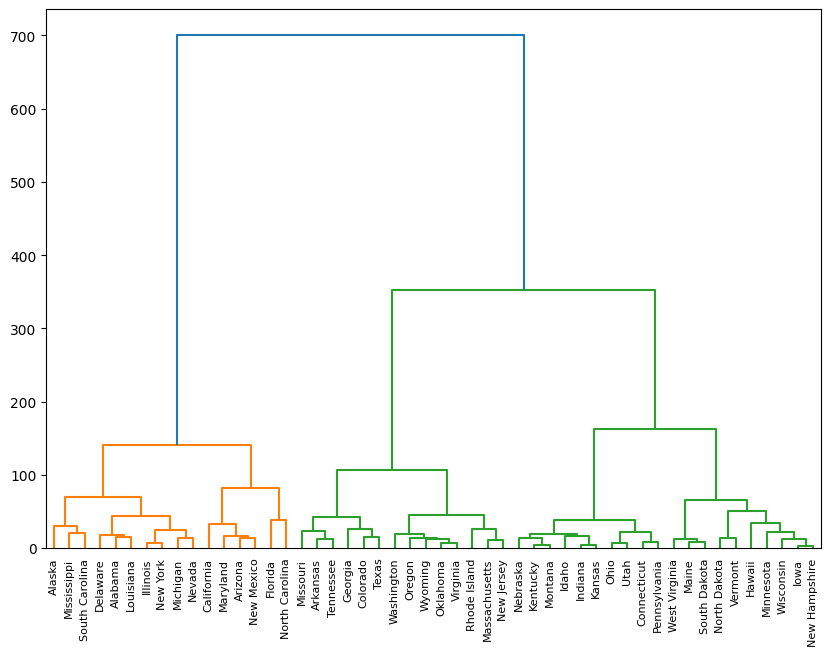

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(x, 'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels = list(y))

Missouri, Arkansas, and Tennessee are similar to each other, but Arkansas and Tennessee are more similar to each other than they are to Missouri. In the case of this model, it is easy to look at the graph and see 3 distinct clusters.

In [11]:
from sklearn.cluster import AgglomerativeClustering
#divides the population into several clusters such that the data points are in the same cluster as other datapoints that are similar to them
cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
cluster.fit_predict(x)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

Text(0, 0.5, 'Urban Population')

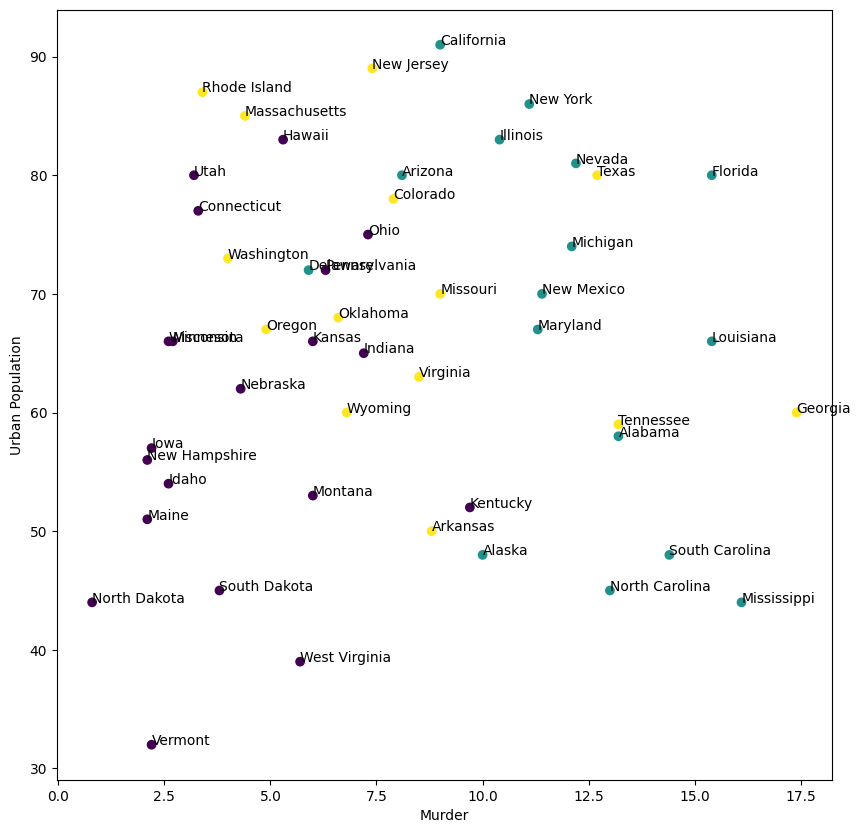

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(x['Murder'],x["UrbanPop"],c=cluster.labels_)
for i, txt in enumerate(y):
    plt.annotate(txt, (x['Murder'][i], x['UrbanPop'][i]))

plt.xlabel('Murder')
plt.ylabel("Urban Population")

# Dimensionality Reduction

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [14]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.7402597402597403


c:\Users\babab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


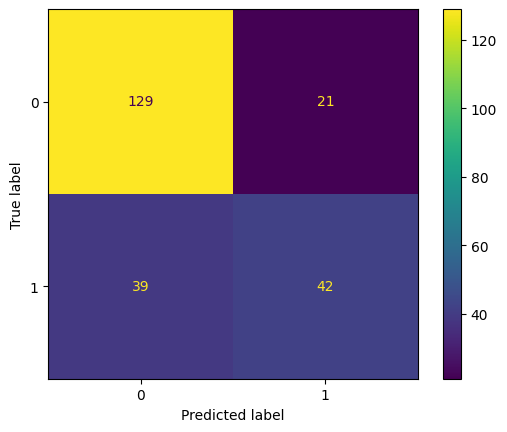

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [17]:
from sklearn.decomposition import TruncatedSVD
#singular value decomposition = factorization technique for real or complex numbers in a matrix
#in short, it is untangling patterns in the numbers using matrix decomposition
#linear algebra is non negotiable here
#truncated svd is typically used for sparse datasets (not this one)
#and it (unlike some other dimensionality techniques) doesnt produce a list of features it is selecting
#because it is more abstract than that
svd = TruncatedSVD(n_components=6)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.fit_transform(X_test)

model = LogisticRegression(random_state=42).fit(X_train_svd, y_train)
model.score(X_test_svd, y_test)

0.7402597402597403

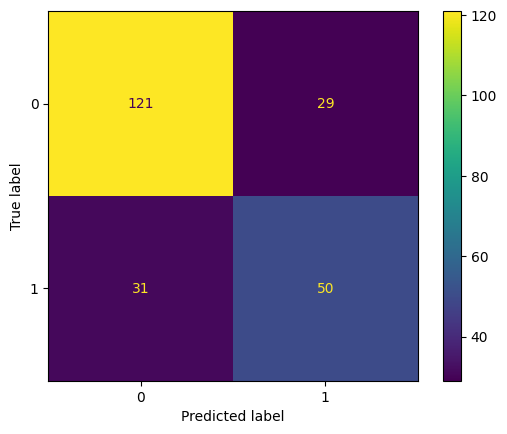

In [18]:
ConfusionMatrixDisplay.from_estimator(model, X_test_svd, y_test)